In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/book_sales.csv',
                index_col='Date',
                parse_dates=['Date'],
                )
df.head()

,Paperback,Hardcover
Date,,
2000-04-01,199,139
2000-04-02,172,128
2000-04-03,111,172
2000-04-04,209,139
2000-04-05,161,191


In [3]:
df = df.drop('Paperback', axis=1)

In [4]:
import numpy as np
df['Time'] = np.arange(len(df.index))
df.head()

,Hardcover,Time
Date,,
2000-04-01,139,0
2000-04-02,128,1
2000-04-03,172,2
2000-04-04,139,3
2000-04-05,191,4


C:\Users\zonn\AppData\Local\Temp\ipykernel_14404\1783600990.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Text(0.5, 1.0, 'Time Plot of Hardcover Sales')

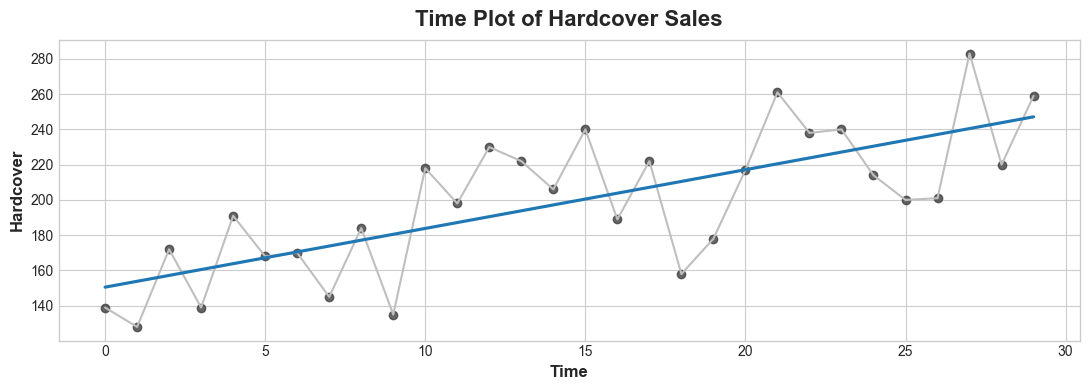

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
plt.rc('figure', autolayout=True, figsize=(11, 4), titlesize=18, titleweight='bold')
plt.rc('axes', labelweight='bold', labelsize='large', titleweight='bold', titlesize=16, titlepad=10)

fig, ax = plt.subplots()
ax.plot('Time', 'Hardcover', data=df, color='0.75')
ax = sns.regplot(x='Time', y='Hardcover', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Hardcover Sales')

In [6]:
df['Lag_1']=df['Hardcover'].shift(1)
df=df.reindex(columns=['Hardcover', 'Lag_1'])
df.head()

,Hardcover,Lag_1
Date,,
2000-04-01,139,NaN
2000-04-02,128,139.0
2000-04-03,172,128.0
2000-04-04,139,172.0
2000-04-05,191,139.0


Text(0.5, 1.0, 'Lag Plot of Hardcover Sales')

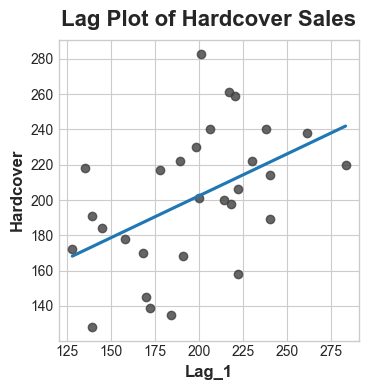

In [8]:
fig, ax = plt.subplots()
ax = sns.regplot(x='Lag_1', y='Hardcover', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Hardcover Sales')

In [10]:
tunnel = pd.read_csv('data/tunnel.csv', parse_dates=['Day'])
tunnel.head()

,Day,NumVehicles
0,2003-11-01,103536
1,2003-11-02,92051
2,2003-11-03,100795
3,2003-11-04,102352
4,2003-11-05,106569


In [11]:
tunnel = tunnel.set_index('Day')
tunnel = tunnel.to_period()
tunnel.head()

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


In [12]:
df_t = tunnel.copy()
df_t['Time'] = np.arange(len(tunnel.index))
df_t.head()

,NumVehicles,Time
Day,,
2003-11-01,103536,0
2003-11-02,92051,1
2003-11-03,100795,2
2003-11-04,102352,3
2003-11-05,106569,4


In [16]:
from sklearn.linear_model import LinearRegression

X = df_t.loc[:, ['Time']]
y = df_t.loc[:, 'NumVehicles']

model = LinearRegression()
model.fit(X, y)

y_pred_ = model.predict(X)
y_pred = pd.Series(y_pred_, index=X.index)

In [18]:
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

Text(0.5, 1.0, 'Time Plot of Tunnel Traffic')

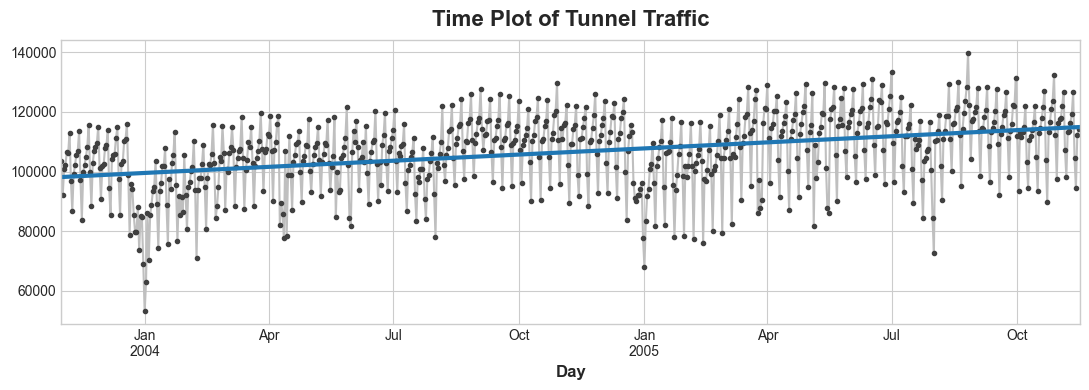

In [20]:
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Tunnel Traffic')

In [21]:
df_t['Lag_1'] = df_t['NumVehicles'].shift(1)
df_t.head()

,NumVehicles,Time,Lag_1
Day,,,
2003-11-01,103536,0,NaN
2003-11-02,92051,1,103536.0
2003-11-03,100795,2,92051.0
2003-11-04,102352,3,100795.0
2003-11-05,106569,4,102352.0


In [22]:
X = df_t.loc[:, ['Lag_1']]
X.dropna(inplace=True)
y = df_t.loc[:, 'NumVehicles']
X.head()

,Lag_1
Day,
2003-11-02,103536.0
2003-11-03,92051.0
2003-11-04,100795.0
2003-11-05,102352.0
2003-11-06,106569.0


In [23]:
y.head()

Day
2003-11-01    103536
2003-11-02     92051
2003-11-03    100795
2003-11-04    102352
2003-11-05    106569
Freq: D, Name: NumVehicles, dtype: int64

In [24]:
# drop corresponding values in target
y, X = y.align(X, join='inner')
X.head()

,Lag_1
Day,
2003-11-02,103536.0
2003-11-03,92051.0
2003-11-04,100795.0
2003-11-05,102352.0
2003-11-06,106569.0


In [25]:
y.head()

Day
2003-11-02     92051
2003-11-03    100795
2003-11-04    102352
2003-11-05    106569
2003-11-06    106284
Freq: D, Name: NumVehicles, dtype: int64

In [27]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [28]:
y_pred_ = model.predict(X)
y_pred = pd.Series(y_pred_, index=X.index)

Text(0.5, 1.0, 'Lag Plot of Tunnel Traffic')

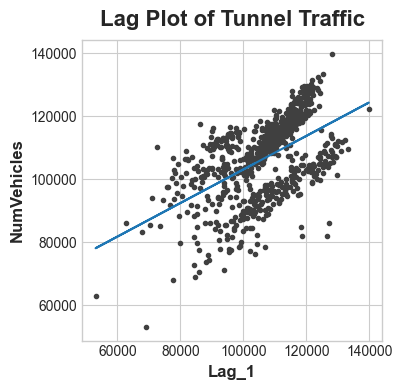

In [29]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('NumVehicles')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of Tunnel Traffic')

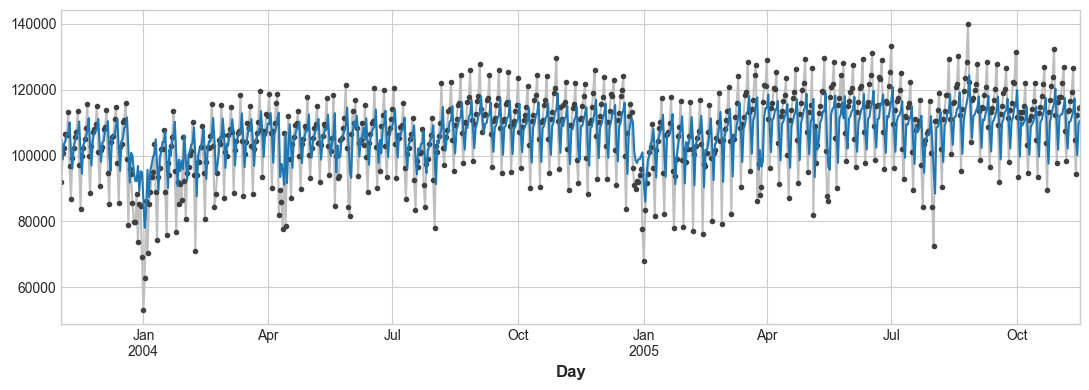

In [30]:
ax = y.plot(**plot_params)
ax = y_pred.plot()